## 1. Problem

In [1]:
import numpy as np # khám phá matrix
import matplotlib.pyplot as plt # hiển thị ảnh
import matplotlib.image as mpimg # đọc ảnh

In [4]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0 # [0,1]

In [5]:
image_origin.dtype

dtype('float64')

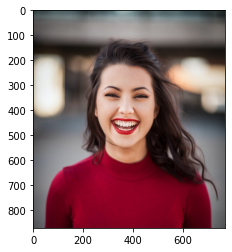

In [7]:
plt.imshow(image_origin); # nếu số thực [0,1], số nguyên [0,255]

### 1.1 Cùng là 1 ảnh và cùng độ sáng

In [8]:
a = 1
b = 0
image_tranform = image_origin * a + b

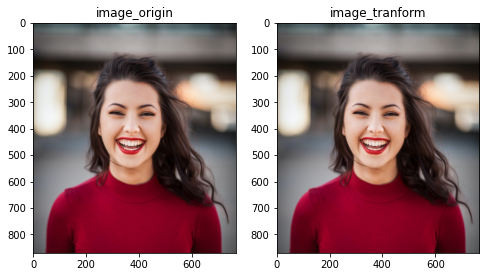

In [9]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [10]:
# Absolute Difference
np.abs(image_origin - image_tranform).sum()

0.0

### 1.2 Cùng là 1 ảnh nhưng khác độ sáng

In [11]:
a = 0.2
b = 0.01
image_tranform = image_origin * a + b

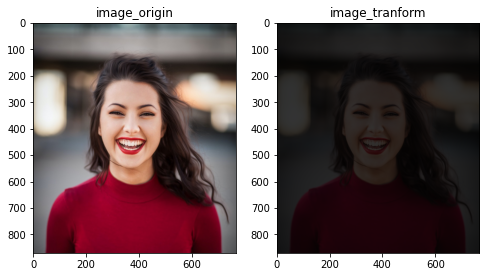

In [12]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [13]:
# Absolute Difference
np.abs(image_origin - image_tranform).sum()

597131.711764706

In [14]:
# MSE Difference
((image_origin - image_tranform)**2).sum()

259220.0051758554

### 1.3 Khối lượng tính toán lớn

- Bạn hãy tưởng tượng 1 bức ảnh 500x500x3 = 750000 giá trị
- Database có 10000 bức ảnh 500x500x3 như vậy = 10000 * 750000 = 7.500.000.000 giá trị

đem 1 bức ảnh similarity cho cả database là điều không khả quan

### 1.4 Chưa được bảo mật

1 bức ảnh similarity cho cả database hết sức nguy hiểm, vì đụng trực tiếp vào database

...

## 2. Problem Solving

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

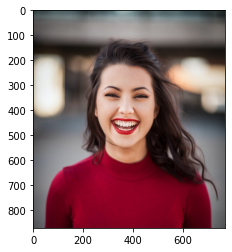

In [17]:
plt.imshow(image_origin);

### 2.1 Triệt tiêu sai khác độ sáng (ax + b)

* Triệt tiêu a -> Cosine Similarity

In [18]:
a = 0.5
b = 0
image_tranform = image_origin * a + b

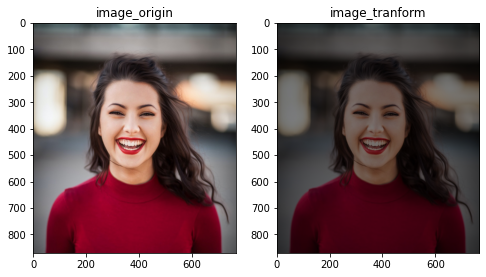

In [19]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [20]:
# Absolute Difference => nope
(image_origin - image_tranform).sum()

384161.10784313735

In [35]:
#code numpy
def norm2(x, axis=None):
    return np.sqrt(np.sum(x**2, axis=axis, keepdims=True))

In [32]:
image_origin.shape, image_tranform.shape

((870, 768, 3), (870, 768, 3))

In [36]:
norm2(image_origin, axis=(0,1)).shape

(1, 1, 3)

In [37]:
# Ứng dụng norm 2
image_origin_norm = image_origin / norm2(image_origin, axis=(0,1))
image_tranform_norm = image_tranform / norm2(image_tranform, axis=(0,1))

In [38]:
np.abs(image_origin_norm - image_tranform_norm).sum()

0.0

* Triệt tiêu b

In [39]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

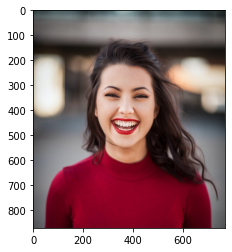

In [40]:
plt.imshow(image_origin);

In [41]:
a = 1
b = 0.05
image_tranform = image_origin * a + b

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


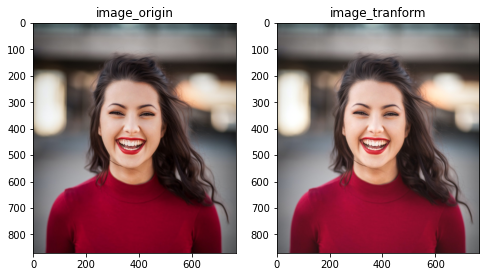

In [42]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [43]:
# Absolute Difference => nope
(image_origin - image_tranform).sum()

-100224.00000000033

In [44]:
# Ứng dụng mean
image_origin_mean = image_origin - np.mean(image_origin, axis=(0,1))
image_tranform_mean = image_tranform - np.mean(image_tranform, axis=(0,1))

In [45]:
#MSE
((image_origin_mean - image_tranform_mean)**2).sum()

3.2490518925152182e-18

* Triệt tiêu cả a và b -> Correlation Coefficient 

In [46]:
image_origin = mpimg.imread("big_smile_high.jpg")/255.0

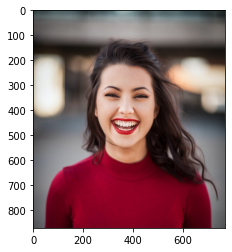

In [47]:
plt.imshow(image_origin);

In [48]:
a = 0.2
b = 0.1
image_tranform = image_origin * a + b

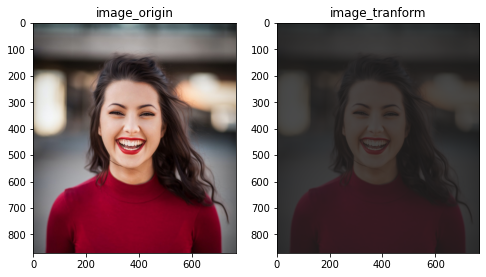

In [49]:
_, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
for name, img, ax in zip(["image_origin", "image_tranform"], [image_origin, image_tranform], axs):
    ax.imshow(img)
    ax.set_title(name)
plt.show()

In [50]:
# Absolute Difference => nope
np.abs(image_origin - image_tranform).sum()

462543.8447058821

In [51]:
# Ứng dụng mean
image_origin_mean = image_origin - np.mean(image_origin, axis=(0,1))
image_tranform_mean = image_tranform - np.mean(image_tranform, axis=(0,1))

In [52]:
# Ứng dụng norm 2
image_origin_mean_norm = image_origin_mean / norm2(image_origin_mean, axis=(0,1))
image_tranform_mean_norm = image_tranform_mean / norm2(image_tranform_mean, axis=(0,1))

In [53]:
#MSE
((image_origin_mean_norm - image_tranform_mean_norm)**2).sum()

4.772635918090907e-23

### 2.2 Khối lượng tính toán lớn

* Giảm chiều của ảnh

* Phân cụm (Kmean, split database)

### 2.3 Chưa được bảo mật

* Dùng fearture extractor (mask database) để similarity